In [ ]:
#https://www.youtube.com/watch?v=vRVVyl9uaZc
import numpy as np
from dataclasses import dataclass, field
import pdg as pdgtmp

@dataclass
class hep2:
    G_F: float    #=1.166370E-05    # G_F,Fermi constant
    α_s:float #=1.187000E-01    #(MZ) SM MSbar
    M_Z:float    #=9.118870E+01    # Z-boson pole mass'
    v:float=field(init=False)
    pdg:dict
    def __post_init__(self):
        self.v=1/np.sqrt(np.sqrt(2)*self.G_F)
    
sm=hep2(G_F=1.166370E-05,α_s=1.187000E-01,M_Z=9.118870E+01,pdg=pdgtmp.pdgid_names)

In [ ]:
sm.G_F

1.16637e-05

In [ ]:
sm.α_s

0.1187

In [ ]:
sm.v

246.22056907348588

In [ ]:
import numpy as np
import pdg as pdgtmp
def revert_dict(dictionary):
        return dict((v,k) for k,v in dictionary.items())

import pdg as pdgtmp
class hep:
    def __init__(self,G_F=(1.1663787E-05,0.0000006E-05),α_s=(0.1179,0.0010),M_Z=(9.11876E+01,0.00021E+01),
                 αm1=(127.952,0.009),M_W=(80.379,0.012),sin2θW=(0.23122,0.00004),
                 mt=(172.5,0.7),mH=(125.25,0.17),pdg=pdgtmp.pdgid_names):
        self.G_F=G_F[0]
        self.α_s=α_s[0]
        self.M_Z=M_Z[0]
        self.α=1/αm1[0]
        self.M_W=M_W[0]
        self.sin2θW=sin2θW[0]
        self.mt=mt[0]
        self.mH=mH[0]
        self.pdg=pdg
        self.pdg_names=revert_dict(self.pdg)
        assert abs(1-self.M_W**2/self.M_Z**2-np.pi*self.α/(np.sqrt(2)*self.G_F*self.M_W**2) )<0.009
        #Others
        self.v=1/np.sqrt(np.sqrt(2)*self.G_F)
        self.θW=np.sqrt( np.arcsin(self.sin2θW))
        self.g2=np.sqrt( 8*self.M_W**2*self.G_F/np.sqrt(2) )        
        self.g1=self.g2*np.tan(self.θW)
        self.e=np.sqrt(4*np.pi*self.α)
        assert abs( self.M_Z-self.M_W/np.cos(self.θW) )<0.5
        assert self.g2==2*self.M_W/self.v
    def v_a(self,f):
        '''
        Neutral current couplings
        '''
        vf=0.5
        af=0.5
        if f=='u' or f=='c' or f=='t':
            vf=vf-0.5*(8/3)*self.sin2θW
            af=af
        elif f=='d' or f=='s'or f=='b':
            vf=-vf+0.5*(4/3)*self.sin2θW
            af=-af
        elif f=='ν_e' or f=='ν_μ' or f=='ν_τ':
            vf=vf
            af=af
        elif f=='e' or f=='μ' or f=='τ':
            vf=-vf+0.5*(4)*self.sin2θW
            af=-af
        else:
            vf=0
            af=0
        return vf,af        

In [195]:
sm=hep()
M_Zp=4000
global X
X={'Q':-1/33,'u':-37/33,'d':35/33,'L':1/11,'e':-13/11,'h':-12/11}

In [50]:
def V(f):
    return sm.e*sm.v_a(f)[0]/( 2*np.cos(sm.θW)*np.sin(sm.θW) )

In [241]:
def ϵ_gX(M_Zp,ϵto0=False,approx=False):
    if isinstance(M_Zp,list):
        M_Zp=np.array(M_Zp)
    if ϵto0:
        return 0
    else:
        if not approx:
            return -sm.g2*X['h']**2*sm.v**2/( 4*np.cos(sm.θW)*M_Zp**2   )
        else:
            return -1/( 2*np.sqrt(np.sqrt(2)*sm.G_F) )*(sm.M_Z/M_Zp**2)*X['h']**2
M_Zp=4000
assert abs( ( ϵ_gX(M_Zp)-ϵ_gX(M_Zp,approx=True) )/ϵ_gX(M_Zp) )< 0.005        

In [295]:
def ℒ_eff(M_Zp,F,f,χ=1,gX=0.1,ϵto0=False,approx=False):
    if isinstance(M_Zp,list):
        M_Zp=np.array(M_Zp)
    
    if ϵto0:
        approx=False
    if not approx:
        return gX**2*χ*(  (1/M_Zp**2)*( (X[F]+X[f])/2-ϵ_gX(M_Zp,ϵto0=ϵto0)*V(f) ) 
                    + (1/sm.M_Z**2)*ϵ_gX(M_Zp,ϵto0=ϵto0)*( V(f)+gX**2*ϵ_gX(M_Zp,ϵto0=ϵto0)*( (X[F]+X[f])/2 )  ) )
    else:
        return gX**2*χ*( (1/M_Zp**2)*(X[F]+X[f])/2 + (1/sm.M_Z**2)*ϵ_gX(M_Zp)*V(f)  )
    
M_Zp=4000
assert abs((ℒ_eff(M_Zp,'Q','d',χ=1,gX=0.1,ϵto0=False)-ℒ_eff(M_Zp,'Q','d',χ=1,gX=0.1,ϵto0=False,approx=True)
           )/ℒ_eff(M_Zp,'Q','d',χ=1,gX=0.1,ϵto0=False))<1E-3    

In [296]:
M_Zp=4000

In [297]:
ℒ_eff(M_Zp,'Q','d',χ=1,gX=0.1,ϵto0=False)

4.5359145893310614e-10

In [298]:
ℒ_eff(M_Zp,'Q','d',χ=1,gX=0.1,ϵto0=True)

3.2196969696969696e-10

In [279]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [300]:
M_Zp=np.logspace(np.log10(100),np.log10(10000))

(4e-09, 1e-08)

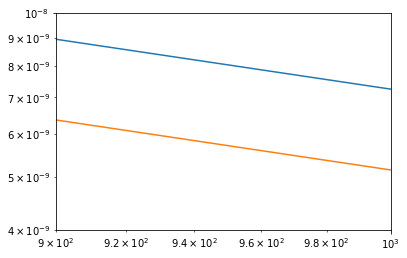

In [307]:
plt.loglog(M_Zp,  np.abs(ℒ_eff(M_Zp,'Q','d',χ=1,gX=0.1,ϵto0=False))   )
plt.loglog(M_Zp,  np.abs(ℒ_eff(M_Zp,'Q','d',χ=1,gX=0.1,ϵto0=True))   )
plt.xlim(900,1000)
plt.ylim(4E-9,1E-8)

In [323]:
M_Zp=4000
X={'Q':-1/33,'u':-37/33,'d':35/33,'L':1/11,'e':-13/11,'h':-12/11}
X=dict( zip(X.keys(),np.array(list(X.values()))/100) )

In [324]:
X

{'Q': -0.00030303030303030303,
 'u': -0.011212121212121211,
 'd': 0.010606060606060605,
 'L': 0.0009090909090909091,
 'e': -0.011818181818181818,
 'h': -0.010909090909090908}

In [318]:
X.values()

dict_values([-0.030303030303030304, -1.121212121212121, 1.0606060606060606, 0.09090909090909091, -1.1818181818181819, -1.0909090909090908])

In [325]:
ℒ_eff(M_Zp,'Q','d',χ=1,gX=0.1,ϵto0=False)

3.2328587179490475e-12

In [326]:
ℒ_eff(M_Zp,'Q','d',χ=1,gX=0.1,ϵto0=True)

3.2196969696969697e-12

In [327]:
M_Zp=4000
X={'Q':-1/33,'u':-37/33,'d':35/33,'L':1/11,'e':-13/11,'h':-12/11}
X=dict( zip(X.keys(),np.array(list(X.values()))*10) )

In [328]:
X

{'Q': -0.30303030303030304,
 'u': -11.212121212121211,
 'd': 10.606060606060606,
 'L': 0.9090909090909092,
 'e': -11.818181818181818,
 'h': -10.909090909090908}

In [329]:
ℒ_eff(M_Zp,'Q','d',χ=1,gX=0.1,ϵto0=False)

1.6809389912595084e-08

In [330]:
ℒ_eff(M_Zp,'Q','d',χ=1,gX=0.1,ϵto0=True)

3.21969696969697e-09